In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from functools import partial

In [6]:
%matplotlib inline

### Problems

#### Q 2.1

The following data are an i.i.d. sample from a Cauchy(θ, 1) distribution: 1.77, −0.23,
2.76, 3.80, 3.47, 56.75, −1.34, 4.24, −2.44, 3.29, 3.71, −2.40, 4.53, −0.07, −1.05,
−13.87, −2.53, −1.75, 0.27, 43.21

In [7]:
data = [1.77, -0.23, 2.76, 3.80, 3.47, 56.75, -1.34, 4.24, -2.44, 3.29, 3.71, -2.40, 4.53, -0.07, -1.05, 
        -13.87, -2.53, -1.75, 0.27, 43.21]

a) graph log-likelihood function

In [8]:
# take theta to range from -15 to 15
# likelihood will look like product of all cauchy
def cauchy_dist(x, loc, scale):
    expr = 1 + ((x - loc) / scale) ** 2
    return 1 / (np.pi * scale * expr)

In [9]:
x = np.linspace(-5, 5)
standard_cauchy = partial(cauchy_dist, loc=0, scale=1)

y = np.array(list(map(standard_cauchy, x)))

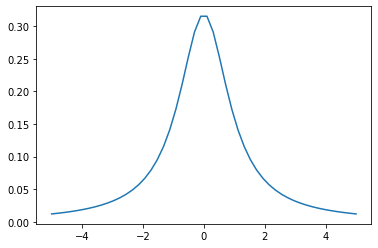

In [10]:
plt.plot(x, y)

In [60]:
def c_likelihood_theta(samples):
    p_likelihood = partial(cauchy_dist, scale=1)
    funcs = [partial(p_likelihood, val) for val in samples]
    return lambda x: np.prod([f(x) for f in funcs])

In [62]:
likelihood = c_likelihood_theta(data)
x = np.linspace(-20, 20)
y = list(map(likelihood, x))

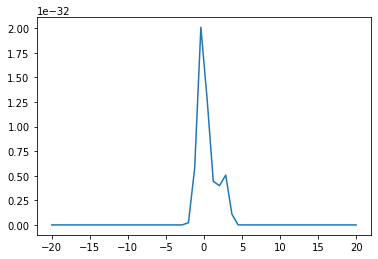

In [63]:
plt.plot(x,y)

In [64]:
max_idx = np.argmax(y)
max_idx

24

In [65]:
def log_c_likelihood_theta(samples):
    p_likelihood = partial(cauchy_dist, scale=1)
    funcs = [partial(p_likelihood, val) for val in samples]
    return lambda x: np.sum([np.log10(f(x)) for f in funcs])

In [66]:
log_likelihood = log_c_likelihood_theta(data)
z = list(map(log_likelihood, x))

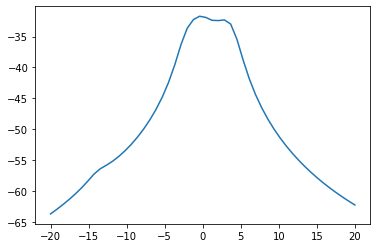

In [67]:
plt.plot(x,z)

In [70]:
max_log_idx = np.argmax(z)
max_log_idx
max_log_idx == max_idx
# evidence that maximizing log-likelihood also maximizes likelihood 

True

In [71]:
# Newton Raphson